In [1]:
import pandas as pd
data=pd.read_csv("/content/ConsumerGood.csv")
print(data)

     rownames  distribution     share     price
0           1         0.905  2.740407  105.9539
1           2         0.900  3.008390  106.2491
2           3         0.988  2.203097  107.1034
3           4         0.960  2.669520  106.4975
4           5         0.954  2.872620  105.9954
..        ...           ...       ...       ...
103       104         0.309  0.387469  105.1434
104       105         0.281  0.306534  107.9035
105       106         0.392  0.454702  105.5276
106       107         0.361  0.323122  104.3665
107       108         0.142  0.198953  104.4973

[108 rows x 4 columns]


In [2]:
data.isna().sum()

rownames        0
distribution    0
share           0
price           0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["rownames"]=b.fit_transform(data["rownames"])
data["distribution"]=b.fit_transform(data["distribution"])
data["share"]=b.fit_transform(data["share"])
data["price"]=b.fit_transform(data["price"])
print(data)

     rownames  distribution  share  price
0           0            61     85     17
1           1            60     95     19
2           2            88     72     25
3           3            76     82     22
4           4            75     89     18
..        ...           ...    ...    ...
103       103             8      7     12
104       104             6      3     36
105       105            12     10     15
106       106            11      4      5
107       107             1      0      6

[108 rows x 4 columns]


In [7]:
x=data.drop("price",axis=1)
y=data["price"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

    rownames  distribution  share
43        43            62     69
85        85            45     35
10        10            63     79
88        88            50     38
20        20            77    102
..       ...           ...    ...
11        11            89     96
71        71            24     31
75        75            31     21
95        95            16     14
37        37            52     63

[105 rows x 3 columns]
43    89
85    28
10    44
88    37
20    61
      ..
11    34
71    58
75    31
95    24
37    93
Name: price, Length: 105, dtype: int64


In [10]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [11]:
c=br.predict([[109,0.435,0.54783]])
print(c)

[34.27158295]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


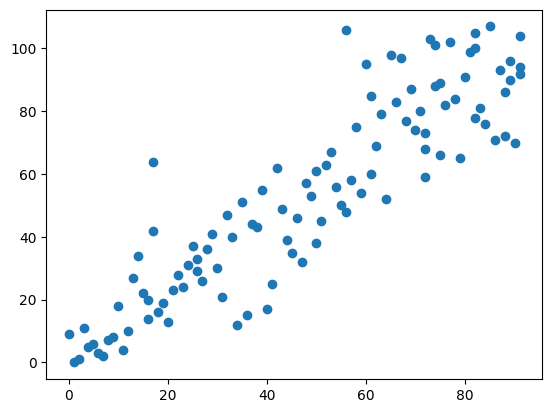

In [14]:
from matplotlib import pyplot as plt
plt.scatter(data["distribution"],data["share"])
